# Customer Churn Prediction

* Dataset: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

## Data Preparation

In [1]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# read the data using pandas `read_csv` method.
data = pd.read_csv("data.csv")

In [3]:
# view first five rows
data.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [4]:
# Columns
print("Number of columns::", data.shape[1])
print("Columns::", data.columns.to_list())

Number of columns:: 21
Columns:: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [5]:
# change the column name case into lowercase and space with '_'.
data.columns = data.columns.str.lower().str.replace(" ", "_")

In [6]:
# Change the string case of categorical variable values.
categorical_cols = data.select_dtypes(include='object').columns.tolist()

for col in categorical_cols:
    data[col] = data[col].str.lower().str.replace(" ", "_")

In [7]:
# Let's check the data again
data.head(2).T

,0,1
customerid,7590-vhveg,5575-gnvde
gender,female,male
seniorcitizen,0,0
partner,yes,no
dependents,no,no
tenure,1,34
phoneservice,no,yes
multiplelines,no_phone_service,no
internetservice,dsl,dsl
onlinesecurity,no,yes


In [8]:
# datatypes
data.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [9]:
# Convert the `totalcharges` datatype form object to numerics
data['totalcharges'] = pd.to_numeric(data.totalcharges,errors='coerce')

# Fill the missing values in 'totalcharges' with value 0
data['totalcharges'] = data.totalcharges.fillna(value=0)

In [10]:
# Convert the `churn` datatype as well
data['churn'] = (data.churn =='yes').astype('int')

## Setting up validation framework
Splitting data into train/validation/test datasets using `train_test_split` function

In [11]:
from sklearn.model_selection import train_test_split

# Split the data into X and y.
X = data.drop(columns=['churn'], axis=1).copy()
y = data['churn'].copy()

# first split the data into ratio 80:20 for training and test dataset
X_full, X_test, y_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# next, split the data X_full and y_full into train, and validation dataset
X_train, X_val, y_train, y_val = train_test_split(X_full, y_full, test_size=0.25, random_state=42)

In [12]:
print("X_train shape::", X_train.shape)
print("X_val shape::", X_val.shape)
print("X_test shape::", X_test.shape)

X_train shape:: (4225, 20)
X_val shape:: (1409, 20)
X_test shape:: (1409, 20)


In [13]:
# Reset the index
X_train.reset_index(drop=True, inplace=True)
X_val.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

y_train.reset_index(drop=True, inplace=True)
y_val.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)


# Exploratory Data Analysis
* check for missing values
* Analyze the target variable('churn')
* Analyze the numerical and categorical variables

In [14]:
# Check for missing values in data
X_full.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
dtype: int64

There are no null values present in the data

In [15]:
# Churn value counts
y_full.value_counts()

0    4138
1    1496
Name: churn, dtype: int64

In [16]:
# Churn rate
y_full.mean()

0.2655307064252751

The instances for the customer who churns are 1496 which is almost only the 30% of the available data. The given data is highly imbalance data.

In [27]:
numeric_cols = ['tenure', 'monthlycharges', 'totalcharges']
categorical_cols = ['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice','onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport','streamingtv', 'streamingmovies', 'contract', 'paperlessbilling','paymentmethod']

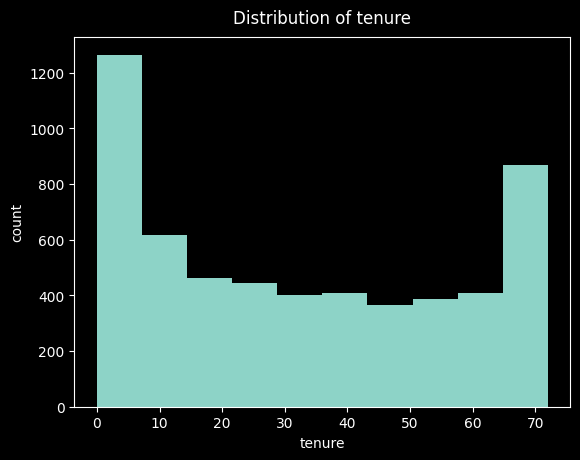

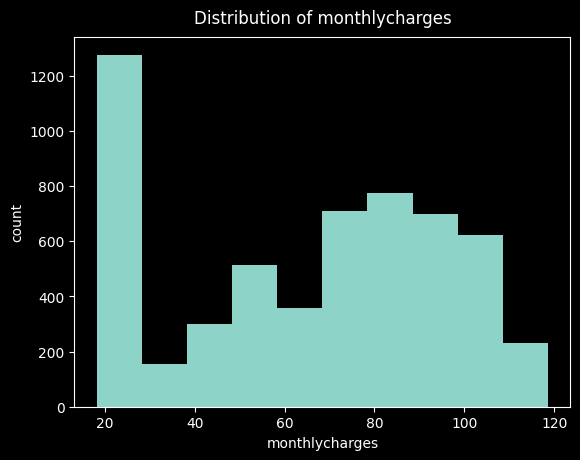

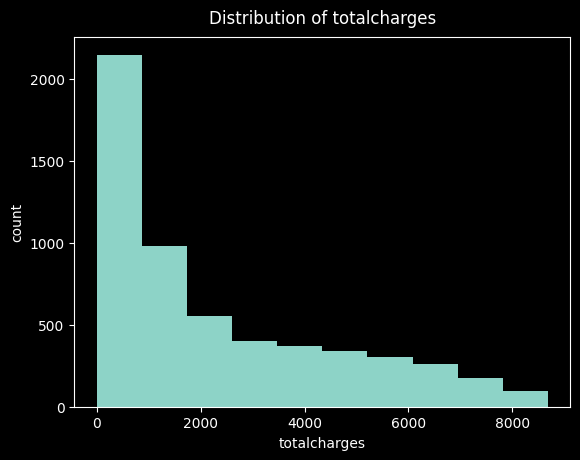

In [23]:
# Univariate analysis
for col in numeric_cols:
    plt.hist(X_full[col])
    plt.title(f"Distribution of {col}", size=12, pad=10)
    plt.xlabel(f"{col}", size=10)
    plt.ylabel("count", size=10)
    plt.show()

In [28]:
# Unique values in categorical data
for col in categorical_cols:
    print(col)
    print("Number of unique::", X_full[col].nunique())
    print(X_full[col].unique())
    print("---"*10)

gender
Number of unique:: 2
['female' 'male']
------------------------------
seniorcitizen
Number of unique:: 2
[0 1]
------------------------------
partner
Number of unique:: 2
['no' 'yes']
------------------------------
dependents
Number of unique:: 2
['yes' 'no']
------------------------------
phoneservice
Number of unique:: 2
['yes' 'no']
------------------------------
multiplelines
Number of unique:: 3
['no' 'yes' 'no_phone_service']
------------------------------
internetservice
Number of unique:: 3
['dsl' 'fiber_optic' 'no']
------------------------------
onlinesecurity
Number of unique:: 3
['yes' 'no' 'no_internet_service']
------------------------------
onlinebackup
Number of unique:: 3
['no' 'yes' 'no_internet_service']
------------------------------
deviceprotection
Number of unique:: 3
['yes' 'no' 'no_internet_service']
------------------------------
techsupport
Number of unique:: 3
['no' 'yes' 'no_internet_service']
------------------------------
streamingtv
Number of uniq